<a href="https://colab.research.google.com/github/rdkdaniel/NLP-Projects/blob/main/Fake_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [8]:
data = pd.read_csv('/content/news_articles.csv')
data = data[['title', 'label']]
data['label'] = data['label'].map({'Real': 0, 'Fake':1})
data.head()

,title,label
0,muslims busted they stole millions in govt ben...,0.0
1,re why did attorney general loretta lynch plea...,0.0
2,breaking weiner cooperating with fbi on hillar...,0.0
3,pin drop speech by father of daughter kidnappe...,0.0
4,fantastic trumps point plan to reform healthc...,0.0


Mean Length 61.23807251908397
Min Length 2
Max Length 443


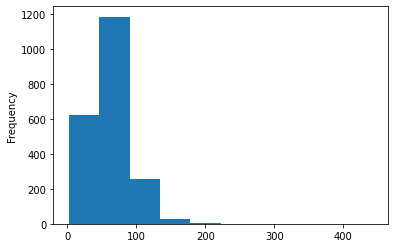

Mean Length 61.23807251908397
Min Length 2
Max Length 443


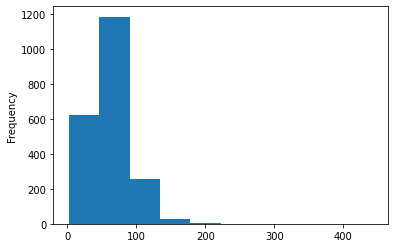

In [10]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())

x = data['title'].apply(len).plot.hist()

# **Preprocessing Data**

In [13]:
#Import nltk preprocessing library to convert text into a readable format
import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

#Tokenize the string (create a list -> each index is a word)
data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

#Define text lemmatization model (eg: walks will be changed to walk)
lemmatizer = WordNetLemmatizer()

#Loop through title dataframe and lemmatize each word
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

#Apply to dataframe
data['title'] = data['title'].apply(lemma)

#Define all stopwords in the English language (it, was, for, etc.)
stop = stopwords.words('english')

#Remove them from our dataframe
data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])

data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: ignored